In [375]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [377]:
import pandas as pd
import scipy
import scipy.io
import numpy as np
from scipy import optimize
import math
from collections import Counter
#import knitro
import matplotlib.pyplot as plt

# set random seed
import random
random.seed(3600021601)

In [378]:
mat3 = scipy.io.loadmat('../inp/100markets3products.mat')  # load mat-file
eta3 = mat3['eta'] # Simulated unobserved error
alphas3 = mat3['alphas'] # Simulated alphas
P_opt3 = mat3['P_opt']
shares3 = mat3['shares']
w3 = mat3['w']
x1_3 = mat3['x1']
xi3 = mat3['xi_all'].flatten("F")
Z3 = mat3['Z']
prices_stacked3 = P_opt3.flatten("F")
shares_stacked3 = shares3.flatten("F")

#Create a df with product characteristics
df3 = pd.DataFrame(x1_3, columns = ['x0','x1','x2'])
df3['price'] = prices_stacked3
df3['share'] = shares_stacked3
df3['eta'] = eta3
df3['w'] = w3
df3['Z'] = Z3


In [379]:
# Now the 5 products data
mat5 = scipy.io.loadmat('../inp/100markets5products.mat')  # load mat5-file
eta5 = mat5['eta'] # Simulated unobserved error
alphas5 = mat5['alphas'] # Simulated alphas
P_opt5 = mat5['P_opt']
shares5 = mat5['shares']
w5 = mat5['w']
x1_5 = mat5['x1']
xi5 = mat5['xi_all'].flatten("F")
Z5 = mat5['Z']
prices_stacked5 = P_opt5.flatten("F")
shares_stacked5 = shares5.flatten("F")

#Create a df with product characteristics
df5 = pd.DataFrame(x1_5, columns = ['x0','x1','x2'])
df5['price'] = prices_stacked5
df5['share'] = shares_stacked5
df5['eta'] = eta5
df5['w'] = w5
df5['Z'] = Z5

## Distribution of prices

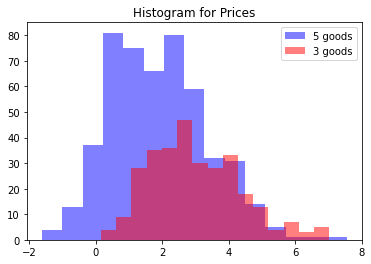

In [380]:
# Compare both histograms
fig, ax = plt.subplots()

# the argument bins control the number of bins and their exact position 
# by default, matplotlib will use 10 equally-spaced bins
ax.hist(df5["price"], bins = 15, ls='dotted', alpha = 0.5, lw=3, color= 'b', label='5 goods')
ax.hist(df3["price"], bins = 15, ls='dotted', alpha = 0.5, lw=3, color= 'r', label='3 goods')
ax.set_title('Histogram for Prices')
ax.legend()

## Distribution of profits

In [381]:
df3['mc'] = 2 + df3['w'] + df3['Z'] + df3['eta']
df3['profitPerUnit'] = df3['price'] - df3['mc']
df3['profits'] = df3['profitPerUnit']*df3['share']

df5['mc'] = 2 + df5['w'] + df5['Z'] + df5['eta']
df5['profitPerUnit'] = df5['price'] - df5['mc']
df5['profits'] = df5['profitPerUnit']*df5['share']

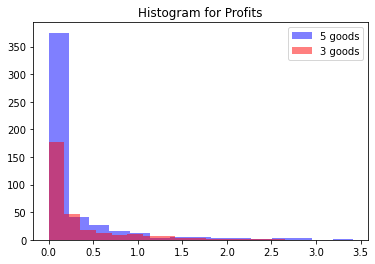

In [382]:
# Compare profits
fig, ax = plt.subplots()

# the argument bins control the number of bins and their exact position 
# by default, matplotlib will use 10 equally-spaced bins
ax.hist(df5["profits"], bins = 15, ls='dotted', alpha = 0.5, lw=3, color= 'b', label='5 goods')
ax.hist(df3["profits"], bins = 15, ls='dotted', alpha = 0.5, lw=3, color= 'r', label='3 goods')
ax.set_title('Histogram for Profits')
ax.legend()

## Consumer surplus

In [383]:
tasteShocks3 = np.random.lognormal(0,1,500)
tasteShocks5 = np.random.lognormal(0,1,500)


# Lets start with the 100 markets, 3 products scenario

$U_{jm}= X_{jm,0}\beta_0 + X_{jm,1}\beta_1 + X_{jm,2}\beta_2 - \alpha_i p_{jm} + \xi_{jm} + \epsilon_{ijm} $

In [384]:
mat3 = scipy.io.loadmat('../inp/100markets3products.mat')  # load mat-file
eta3 = mat3['eta'] # Simulated unobserved error
alphas3 = mat3['alphas'] # Simulated alphas
P_opt3 = mat3['P_opt']
shares3 = mat3['shares']
w3 = mat3['w']
x1_3 = mat3['x1']
xi3 = mat3['xi_all']
Z3 = mat3['Z']
prices_stacked3 = P_opt3.flatten("F")
shares_stacked3 = shares3.flatten("F")




In [385]:
alphas3.shape

(100, 500)

In [386]:
P_opt3.shape

(3, 100)

In [388]:
utilityMatrix = []
taste_shocks3 = []
for j in range(0,100):
    initialJ = j*3
    finalJ = (j+1)*3
    for i in range(0,500):
        #print(i)
        initialI = i*3 
        finalI = (i+1)*3
        alpha = alphas3[j,i]
        x0 = x1_3[initialJ:finalJ,0]
        x1 = x1_3[initialJ:finalJ,1]
        x2 = x1_3[initialJ:finalJ,2]
        xi = xi3[initialJ:finalJ,0]
        p1 = P_opt3[0,j]
        p2 = P_opt3[1,j]
        p3 = P_opt3[2,j]

        epsilon1 = np.random.lognormal(0,1)
        epsilon2 = np.random.lognormal(0,1)
        epsilon3 = np.random.lognormal(0,1) 
        
        taste_shocks3.append([epsilon1,epsilon2,epsilon3])
        
        
        u0 = 0 
        u1 = 5*x0[0] + x1[0] + x2[0] + xi[0] - alpha*p1 + epsilon1
        u2 = 5*x0[1] + x1[1] + x2[1] + xi[1] - alpha*p2 + epsilon2
        u3 = 5*x0[2] + x1[2] + x2[2] + xi[2] - alpha*p3 + epsilon3
        
        utilities = [u0,u1,u2,u3]
        #prices = [0,p1,p2,p3]
        #max_value = max(utilities)
        #max_index = utilities.index(max_value)
        #cs = utilities[max_index] - prices[max_index]
        
        utilityMatrix.append([u0,u1,u2,u3]) #,max_index,cs


In [389]:
df_utilityMatrix3 = pd.DataFrame(utilityMatrix, columns = ['u0','u1','u2', 'u3']) #,'choice','cs'
df_utilityMatrix3['choice']=df_utilityMatrix3.idxmax(axis=1)
df_utilityMatrix3['utility'] = df_utilityMatrix3.max(axis=1)


array([[<AxesSubplot:title={'center':'utility'}>]], dtype=object)

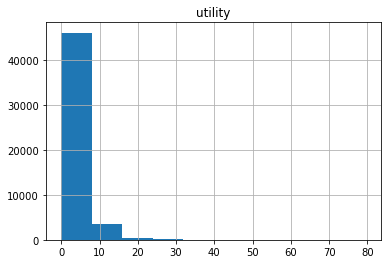

In [391]:
df_utilityMatrix3.hist(column='utility') #weird thing, probably wrong

In [392]:
# Now for the 5 products
utilityMatrix = []
taste_shocks5 = []
for j in range(0,100):
    initialJ = j*5
    finalJ = (j+1)*5
    for i in range(0,500):
        #print(i)
        initialI = i*5 
        finalI = (i+1)*5
        alpha = alphas3[j,i]
        x0 = x1_5[initialJ:finalJ,0]
        x1 = x1_5[initialJ:finalJ,1]
        x2 = x1_5[initialJ:finalJ,2]
        x3 = x1_5[initialJ:finalJ,0]
        x4 = x1_5[initialJ:finalJ,1]
        xi = xi5[initialJ:finalJ]
        p1 = P_opt5[0,j]
        p2 = P_opt5[1,j]
        p3 = P_opt5[2,j]
        p4 = P_opt5[0,j]
        p5 = P_opt5[1,j]

        epsilon1 = np.random.lognormal(0,1)
        epsilon2 = np.random.lognormal(0,1)
        epsilon3 = np.random.lognormal(0,1) 
        epsilon4 = np.random.lognormal(0,1)
        epsilon5 = np.random.lognormal(0,1)
        
        taste_shocks5.append([epsilon1,epsilon2,epsilon3,epsilon4,epsilon5])
        
        
        u0 = 0 
        u1 = 5*x0[0] + x1[0] + x2[0] + xi[0] - alpha*p1 + epsilon1
        u2 = 5*x0[1] + x1[1] + x2[1] + xi[1] - alpha*p2 + epsilon2
        u3 = 5*x0[2] + x1[2] + x2[2] + xi[2] - alpha*p3 + epsilon3
        u4 = 5*x0[1] + x1[3] + x2[3] + xi[3] - alpha*p4 + epsilon4
        u5 = 5*x0[2] + x1[4] + x2[4] + xi[4] - alpha*p5 + epsilon5
        
        utilities = [u0,u1,u2,u3,u4,u5]
        #prices = [0,p1,p2,p3]
        #max_value = max(utilities)
        #max_index = utilities.index(max_value)
        #cs = utilities[max_index] - prices[max_index]
        
        utilityMatrix.append(utilities) #,max_index,cs

In [393]:
df_utilityMatrix5 = pd.DataFrame(utilityMatrix, columns = ['u0','u1','u2', 'u3','u4','u5']) #,'choice','cs'
df_utilityMatrix5['choice']=df_utilityMatrix5.idxmax(axis=1)
df_utilityMatrix5['utility'] = df_utilityMatrix5.max(axis=1)

array([[<AxesSubplot:title={'center':'utility'}>]], dtype=object)

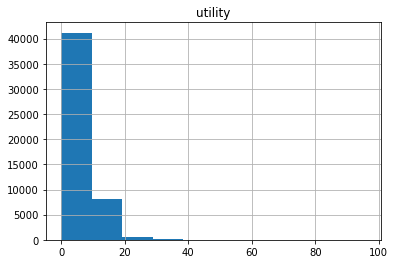

In [394]:
df_utilityMatrix5.hist(column='utility') #weird thing, probably wrong

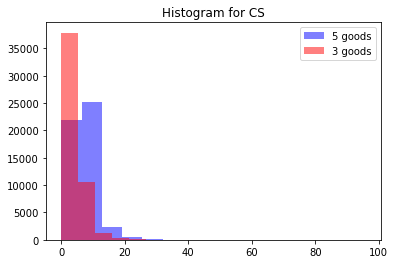

In [395]:
# Compare CS
fig, ax = plt.subplots()

# the argument bins control the number of bins and their exact position 
# by default, matplotlib will use 10 equally-spaced bins
ax.hist(df_utilityMatrix5["utility"], bins = 15, ls='dotted', alpha = 0.5, lw=3, color= 'b', label='5 goods')
ax.hist(df_utilityMatrix3["utility"], bins = 15, ls='dotted', alpha = 0.5, lw=3, color= 'r', label='3 goods')
ax.set_title('Histogram for CS')
ax.legend()

# BLP and Hausman Instruments

## 2.

### 2.a)

$E[\xi_{jm}X_{jm}]$

In [396]:
xi3.shape

(300, 1)

In [397]:
np.mean(np.matmul(np.transpose(xi3),x1_3), axis=0)

array([13.03831111,  6.22257672, 10.65945097])

$E[\xi_{jm}p_{jm}]$

In [398]:
np.matmul(np.transpose(prices_stacked3),xi3)

array([88.48744114])

$E[\xi_{jm}\bar{p}_{jm}]$

In [399]:
hausman_vector = np.zeros(300)
for i in range(0,300):
    hausman_vector[i] = np.mean(np.delete(prices_stacked3, i))

In [400]:
np.mean(hausman_vector*xi3)

0.13153694769686025

$E[\xi_{jm}Z_{jm}]$

In [401]:
np.mean(Z3*xi3)

-0.00814558805654365

### 2.b) 

Only the $E[\xi_{jm}X_{jm}]$ moments seem to be (relatively) valid, since they are relatively small (<0.1). Both price moments give relatively large expected values, so they don't seem valid. 

### 2.c) 

It seems like the only reasonable instruments are the BLP ones, since its moment contition is close to zero. Hausman instruments give a high mean, so it's not OK to use them. 

# 2.2) 

I think that the moments should be:

$E[\xi_{jm}f(Z_{jm})]=0$

$E[\xi_{jm}f(x_{jm})]=0$

$E[\xi_{jm}f(w)]=0$

## Define numeeric integral function

Note that, since we're using $X_{300\times3}$, $Z_{300\times1}$, and $W_{300\times1}$ as instruments, we'll need to estimate $\eta_{5\times1}$ in the objective function. 

Moreover, we'll be estimating 306 parameters through this procedure:

300 $\delta$s

5 $\eta$s

1 $\sigma_{\alpha}$

I'll use W = I, at least for now

In [402]:
R = 500
tasteShocks = np.random.lognormal(0,1,[100,R])
params = np.ones(306)

In [403]:
tasteShocks.shape

(100, 500)

In [404]:
tasteShocks.shape

(100, 500)

In [405]:
def objFunction(params):
    delta = params[0:300]
    eta = params[300:305]
    sigma = params[305]
    
    value = np.matmul(np.transpose(eta),eta)
    
    return(value)

### Constraints:

We will have 305 constraints as well. One for each $s_{jm}$ (there are 300 of them ), one for each $\eta$ (5 of them) 

In [406]:
tasteShocks[0][1]

0.7500304739471639

## shares constraints V1

def sharesConstraints(params):
    deltaVector = params[0:300]
    etaVector = params[300:305]
    sigma = params[305]
    muMatrix = []
    for i in range(0,R):
        muMatrix.append(-tasteShocks[0][i]*prices_stacked3*sigma)

    muMatrix = np.array(muMatrix)
    shares = []

    for j in range(0,300):
        if j%3==0:
            delta1mu = deltaVector[j]+muMatrix[:,j]
            delta2mu = deltaVector[j+1]+muMatrix[:,j+1]
            delta3mu = deltaVector[j+2]+muMatrix[:,j+2]

            maxDeltaMu = np.max(np.array([delta1mu,delta2mu,delta3mu]))

            exp_deltaMu1 = np.exp(delta1+muMatrix[:,j]) #-maxDeltaMu)
            exp_deltaMu2 = np.exp(delta2+muMatrix[:,j+1]) #-maxDeltaMu)
            exp_deltaMu3 = np.exp(delta3+muMatrix[:,j+2]) #-maxDeltaMu)
            sumExp = exp_deltaMu1 + exp_deltaMu2 + exp_deltaMu3 #+ np.exp(-maxDeltaMu)
            exp_deltaMu1_divided = exp_deltaMu1/sumExp
            exp_deltaMu2_divided = exp_deltaMu2/sumExp
            exp_deltaMu3_divided = exp_deltaMu3/sumExp

            shares.append((exp_deltaMu1_divided).sum()/R)
            shares.append((exp_deltaMu2_divided).sum()/R)
            shares.append((exp_deltaMu3_divided).sum()/R)

    sharesDif = shares_stacked3-shares
    return(sharesDif)

sharesConstraints(params).shape        

In [407]:
tasteShocks.shape

(100, 500)

In [408]:
P_opt3.shape

(3, 100)

In [409]:
deltaVector = params[0:300]
etaVector = params[300:305]
sigma = params[305]
muMatrix = np.matmul(P_opt3,tasteShocks)


In [410]:
tasteShocks.shape

(100, 500)

In [411]:
## Start with shares constraints

def sharesConstraints(params):
    deltaVector = params[0:300]
    etaVector = params[300:305]
    sigma = params[305]
    shares = []

    for j in range(0,300):
        if j%3==0:
            market = math.floor(j/3)
            marketShocks = tasteShocks[market,:]
            prices = P_opt3[:,market]
            delta1mu = deltaVector[j]-sigma*marketShocks*prices[0]
            delta2mu = deltaVector[j+1]-sigma*marketShocks*prices[1]
            delta3mu = deltaVector[j+2]-sigma*marketShocks*prices[2]

            #maxDeltaMu = np.max(np.array([delta1mu,delta2mu,delta3mu]))

            exp_deltaMu1 = np.exp(delta1mu) #-maxDeltaMu)
            exp_deltaMu2 = np.exp(delta2mu) #-maxDeltaMu)
            exp_deltaMu3 = np.exp(delta3mu) #-maxDeltaMu)
            sumExp = exp_deltaMu1 + exp_deltaMu2 + exp_deltaMu3 +1 #+ np.exp(-maxDeltaMu)
            exp_deltaMu1_divided = exp_deltaMu1/sumExp
            exp_deltaMu2_divided = exp_deltaMu2/sumExp
            exp_deltaMu3_divided = exp_deltaMu3/sumExp

            shares.append((exp_deltaMu1_divided).sum()/R)
            shares.append((exp_deltaMu2_divided).sum()/R)
            shares.append((exp_deltaMu3_divided).sum()/R)

    sharesDif = shares_stacked3-shares
    return(sharesDif)

sharesConstraints(params).shape        

(300,)

In [412]:
# Eta constraints
def etaConstraints(params):
    deltaVector = params[0:300]
    etaVector = params[300:305]
    sigma = params[305]
    
    instrumentMatrix = np.concatenate((x1_3,Z3,w3),axis=1)
    P_matrix = np.matmul(np.matmul(instrumentMatrix,np.linalg.inv(np.matmul(np.transpose(instrumentMatrix),instrumentMatrix))),np.transpose(instrumentMatrix))
    xi_hat = np.matmul(np.ones([300,300])-np.matmul(np.matmul(x1_3,np.linalg.inv(np.matmul(np.matmul(np.transpose(x1_3),P_matrix),x1_3))),np.matmul(np.transpose(x1_3),P_matrix)),deltaVector)
    
    moment = np.matmul(np.transpose(instrumentMatrix),xi_hat)/300
    
    constraint = etaVector - moment
    
    return(constraint)

In [413]:
def allConstraints(params):
    shares = sharesConstraints(params)
    etas   = etaConstraints(params)
    return np.concatenate((shares,etas), axis=0)

In [414]:
solution = scipy.optimize.minimize(objFunction, np.ones(306), constraints=({'type': 'eq', 'fun': allConstraints}))


In [415]:
# Just to test that the constraints make sense
solution.success

True